In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Valence Classification

# Multiple factor linear regression

In [2]:
data = pd.read_csv(os.path.join('Data', 'data.csv'))
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [3]:
valence_data=data.drop(["artists","id","name","release_date","year","explicit","mode","popularity"],axis=1)
valence_data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
0,0.995,0.708,158648,0.1950,0.563,10,0.1510,-12.428,0.0506,118.469,0.7790
1,0.994,0.379,282133,0.0135,0.901,8,0.0763,-28.454,0.0462,83.972,0.0767
2,0.604,0.749,104300,0.2200,0.000,5,0.1190,-19.924,0.9290,107.177,0.8800
3,0.995,0.781,180760,0.1300,0.887,1,0.1110,-14.734,0.0926,108.003,0.7200
4,0.990,0.210,687733,0.2040,0.908,11,0.0980,-16.829,0.0424,62.149,0.0693


In [4]:
X = valence_data.drop("valence",axis=1)
y = valence_data["valence"].values.reshape(-1, 1)
print(X.shape, y.shape)

(169909, 10) (169909, 1)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
 from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [7]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [9]:
model.fit(X_train_scaled, y_train_scaled)
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.44489000658906197
Testing Score: 0.4385178709031575


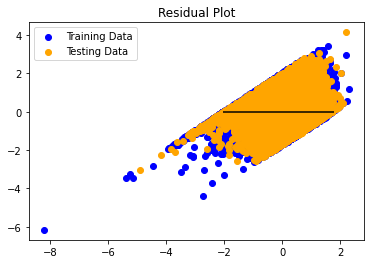

In [10]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [11]:
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")


First 10 Predictions:   [[ 0.3237104 ]
 [-0.00659903]
 [ 0.60753546]
 [-1.19102155]
 [-0.49424776]
 [-0.26987854]
 [-0.202846  ]
 [-1.57560505]
 [ 0.15559142]
 [-0.17292086]]
First 10 Actual labels: [[0.53], [0.327], [0.667], [0.10099999999999999], [0.389], [0.687], [0.652], [0.0603], [0.705], [0.319]]


In [12]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5641972419757224, R2: 0.4385178709031575


# Logistic regression

In [13]:
valence_new=data.drop(["artists","id","name","release_date","year","explicit","mode","popularity"],axis=1)
valence_new['sentiment']=np.where(valence_new['valence']>0.5,"positive","negative")
valence_new=valence_new.drop("valence",axis=1)
valence_new=valence_new.dropna()
valence_new.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,sentiment
0,0.995,0.708,158648,0.1950,0.563,10,0.1510,-12.428,0.0506,118.469,positive
1,0.994,0.379,282133,0.0135,0.901,8,0.0763,-28.454,0.0462,83.972,negative
2,0.604,0.749,104300,0.2200,0.000,5,0.1190,-19.924,0.9290,107.177,positive
3,0.995,0.781,180760,0.1300,0.887,1,0.1110,-14.734,0.0926,108.003,positive
4,0.990,0.210,687733,0.2040,0.908,11,0.0980,-16.829,0.0424,62.149,negative


In [14]:
X = valence_new.drop("sentiment", axis=1)
y = valence_new["sentiment"]
print(X.shape, y.shape)

(169909, 10) (169909,)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [16]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_Scaler=MinMaxScaler().fit(X_train)
X_train_scaled = X_Scaler.transform(X_train)
X_test_scaled = X_Scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [18]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [19]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.7480126499831281
Testing Data Score: 0.7468336550685061


In [20]:
predictions = classifier.predict(X_test_scaled)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['negative' 'negative' 'positive' 'negative' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive']
First 10 Actual labels: ['positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive']


In [21]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,negative,positive
1,negative,negative
2,positive,positive
3,negative,negative
4,positive,positive
...,...,...
42473,negative,negative
42474,positive,positive
42475,positive,positive
42476,negative,negative


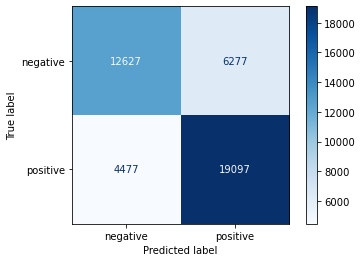

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test_scaled, y_test, cmap=plt.cm.Blues)

plt.show()

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty': ['l1','l2'],
              'C': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(classifier, param_grid, verbose=3)

In [ ]:
grid.fit(X_train_scaled, y_train)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

# Random Forest

In [23]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.7241395545929658

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.8034276566693347

In [25]:
feature_names = valence_new.columns

In [26]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.22938457383726943, 'danceability'),
 (0.14916556084385924, 'energy'),
 (0.10272467507397555, 'duration_ms'),
 (0.09482784078153152, 'loudness'),
 (0.093756146351826, 'speechiness'),
 (0.08982377196526317, 'acousticness'),
 (0.08383751413934189, 'tempo'),
 (0.06977743824558491, 'liveness'),
 (0.05138536062466821, 'instrumentalness'),
 (0.035317118136680016, 'key')]

# Hyperparameter Tuning

In [ ]:
rf.get_params().keys()

In [ ]:
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400, num = 2)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
param_grid = {'n_estimators': n_estimators,
               
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }
grid = GridSearchCV(rf, param_grid, verbose=3)

In [ ]:
grid.fit(X_train_scaled, y_train)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

# KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [29]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

k: 1, Train/Test Score: 1.000/0.731


KeyboardInterrupt: 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

# Hyperparameter tuning

In [ ]:
knn.get_params().keys()

In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = [int(x) for x in np.linspace(start = 1, stop = 3, num = 3)]
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 2, num = 2)]
p=[1,2]
#Convert to dictionary
#hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)


In [ ]:
param_grid = {'leaf_size': leaf_size,
               
               'n_neighbors': n_neighbors,
               'p': p,
               }
grid = GridSearchCV(knn, param_grid, verbose=3)

In [ ]:
#Fit the model
grid.fit(X_train_scaled, y_train)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

# SVM

In [31]:
X = valence_new.drop("sentiment", axis=1)
y = valence_new["sentiment"]
print(X.shape, y.shape)

(169909, 10) (169909,)


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [33]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')

In [34]:
from sklearn.preprocessing import MinMaxScaler
X_Scaler=MinMaxScaler().fit(X_train)
X_train_scaled = X_Scaler.transform(X_train)
X_test_scaled = X_Scaler.transform(X_test)

In [ ]:
model.fit(X_train_scaled, y_train)

In [ ]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

# Hypermeter tuning

In [ ]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
grid.fit(X_train_scaled, y_train)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

# Explicit

# Logistic regression

In [3]:
explicit_new=data.drop(["artists","id","name","release_date","year","mode","popularity"],axis=1)
explicit_new=explicit_new.dropna()
explicit_new.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
0,0.995,0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,0.0506,118.469,0.7790
1,0.994,0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,0.0462,83.972,0.0767
2,0.604,0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0.9290,107.177,0.8800
3,0.995,0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0.0926,108.003,0.7200
4,0.990,0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,0.0424,62.149,0.0693


In [4]:
X = explicit_new.drop("explicit", axis=1)
y = explicit_new["explicit"]
print(X.shape, y.shape)

(169909, 11) (169909,)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_Scaler=MinMaxScaler().fit(X_train)
X_train_scaled = X_Scaler.transform(X_train)
X_test_scaled = X_Scaler.transform(X_test)


In [7]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression()
classifier2

LogisticRegression()

In [8]:
classifier2.fit(X_train_scaled, y_train)

LogisticRegression()

In [9]:
print(f"Training Data Score: {classifier2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier2.score(X_test_scaled, y_test)}")

Training Data Score: 0.9373072486286697
Testing Data Score: 0.9369556005461651


In [10]:
predictions = classifier2.predict(X_test_scaled)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0]
First 10 Actual labels: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


In [11]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
42473,0,0
42474,0,1
42475,0,0
42476,1,0


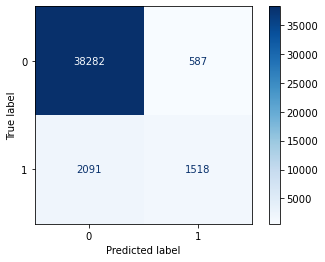

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier2, X_test_scaled, y_test, cmap=plt.cm.Blues)

plt.show()

# Random forest

In [13]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.921653561843778

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.9514572249164274

In [15]:
feature_names = explicit_new.columns

In [16]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.25473665185083144, 'loudness'),
 (0.11315645886559618, 'acousticness'),
 (0.1086132760969563, 'danceability'),
 (0.09165098316586093, 'tempo'),
 (0.0862890998361561, 'liveness'),
 (0.07176767417297675, 'energy'),
 (0.0706082454012859, 'duration_ms'),
 (0.06342682695944299, 'speechiness'),
 (0.058707635591570134, 'explicit'),
 (0.05264518914786456, 'key'),
 (0.02839795891145878, 'instrumentalness')]

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [ ]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)
print('k=11 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

# SVM

In [17]:
X = explicit_new.drop("explicit", axis=1)
y = explicit_new["explicit"]
print(X.shape, y.shape)

(169909, 11) (169909,)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [19]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')

In [20]:
from sklearn.preprocessing import MinMaxScaler
X_Scaler=MinMaxScaler().fit(X_train)
X_train_scaled = X_Scaler.transform(X_train)
X_test_scaled = X_Scaler.transform(X_test)

In [21]:
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [22]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.9312726102753647
Testing Data Score: 0.9312585338292764


# Mode

# Logistic regression

In [ ]:
mode_new=data.drop(["artists","id","name","release_date","explicit","year","popularity"],axis=1)
mode_new=mode_new.dropna()
mode_new.head()

In [ ]:
X = mode_new.drop("mode", axis=1)
y = mode_new["mode"]
print(X.shape, y.shape)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_Scaler=MinMaxScaler().fit(X_train)
X_train_scaled = X_Scaler.transform(X_train)
X_test_scaled = X_Scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier3 = LogisticRegression()
classifier3

In [ ]:
classifier3.fit(X_train_scaled, y_train)

In [ ]:
print(f"Training Data Score: {classifier3.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier3.score(X_test_scaled, y_test)}")

In [ ]:
predictions = classifier3.predict(X_test_scaled)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

In [ ]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier3, X_test_scaled, y_test, cmap=plt.cm.Blues)

plt.show()

# Random forest

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

In [ ]:
feature_names = mode_new.columns

In [ ]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [ ]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

# SVM

In [ ]:
X = mode_new.drop("mode", axis=1)
y = mode_new["mode"]
print(X.shape, y.shape)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_Scaler=MinMaxScaler().fit(X_train)
X_train_scaled = X_Scaler.transform(X_train)
X_test_scaled = X_Scaler.transform(X_test)

In [ ]:
model.fit(X_train_scaled, y_train)

In [ ]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")